# 解答

問題文：01_linear_regressions  
https://github.com/mpsamurai/ml-101-exercises/tree/master/01_linear_regressions


# 単回帰分析

 <font size="5" color='blue'><strong>Q1. 単回帰分析のモデル式を示し、その意味を説明せよ。</strong></font>

 <font size="5" color='red'><strong>A1. </strong></font>

$$
Y = aX + b       : モデル式
$$

説明を考える手順としては、  
１：与えられたデータを見る。  
２：現象を発見する（身長と体重のデータであれば、身長が増えるに従い体重が増加しているという現象を発見する）  
３：どうやってうまく説明できるかを考える。  
４：身長と体重には「線形」の関係で仮定すると説明できるのではないかと考える。  

と、考えこれを一言で説明すると  
「Y = aX + bという関係式で現象を説明できると仮定して分析を行う。 」 である。

 <font size="5" color='blue'><strong>Q2. 単回帰分析が利用可能な例を具体的なデータと共に示せ。</strong></font>

 <font size="5" color='red'><strong>A2. </strong></font>

具体的なデータとして  
次の総務省統計局のデータを参照する。  
平成30年度の5歳～17歳までの男性の平均身長と平均体重を使ったものである。  
参照：https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00400002&tstat=000001011648&cycle=0&tclass1=000001020135&second2=1

|年齢|平均伸長(cm)|平均体重(kg)|
|---|---|---|
|5歳|110.3|18.9|
|6歳|116.5|21.4|
|7歳|122.5|24.1|
|8歳|128.1|27.2|
|9歳|133.7|30.7|
|10歳|138.8|34.1|
|11歳|145.2|38.4|
|12歳|152.7|44.0|
|13歳|159.8|48.8|
|14歳|165.3|54.0|
|15歳|168.4|58.6|
|16歳|169.9|60.6|
|17歳|170.6|62.4|

<img src="images/single_line.png">

グラフに描画したデータ点から見て取れるのは、身長に応じて体重も増えている。  

 <font size="5" color='blue'><strong>Q3. モデルの当てはまりの良さを示す指標について説明せよ。</strong></font>

 <font size="5" color='red'><strong>A3. </strong></font>

モデルの当てはまりの良さを表す指標の一つに「決定係数」がある。  
決定係数を求める式の一つに次の式があり、 
この式の意味とは、  
「予測値の分散が真の値の分散に似ている割合」を表している。

$$
決定係数 = \sum_{i=1}^{n}\frac{(予測値 - 予測の平均値)^2}{(真の値 - 真の平均値)^2}
$$



さらに、決定係数を求める式はもう一つあり、この式の意味とは、  
「予測値から真の値を引いた値の大きさが真の値の分散が大きさに似ている割合」を表している。

$$
決定係数 = 1 - \sum_{i=1}^{n}\frac{(真の値 - 予測値)^2}{(真の値 - 真の平均値)^2}
$$

<img src="images/line.png">

# 重回帰分析

 <font size="4" color='blue'><strong>1. 重回帰分析のモデル式を示し、その意味を説明せよ。</strong></font>

未回答

 <font size="4" color='blue'><strong>2. 重回帰分析が利用可能な例を具体的なデータと共に示せ。</strong></font>

未回答


グラフ作成中

<img src="images/IMG_1624.jpg" width="500px">

<img src="images/IMG_1625.jpg" width="500px">

<img src="images/IMG_1626.jpg" width="500px">

<img src="images/IMG_1627.jpg" width="500px">

<img src="images/IMG_1630.jpg" width="500px" transform="rotate(1, 1)">


Linear Regression Example

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


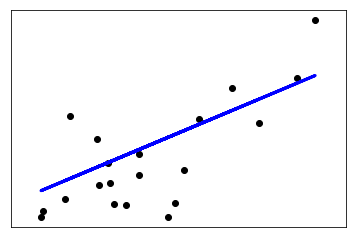

In [1]:
"""
Linear Regression Example
"""

print(__doc__)  # __doc__を使うと、各クラスやメソッドの概要を閲覧出来る


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt  # matplotlib.pyplotモジュールを読み込む
import numpy as np  # numpyを読み込む
from sklearn import datasets, linear_model  # sklearnを読み込む
from sklearn.metrics import mean_squared_error, r2_score  # sklearn.metricsを読み込む
# 以下 jupyter へ表示用
%matplotlib inline  
np.set_printoptions(threshold=100)
# Load the diabetes dataset
diabetes = datasets.load_diabetes()  #  sklearnのdatasetsを読み込む


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]  # datasetsのdict['data']を取り出し、次元数を追加

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]  # トレーニング用に、学習データを配列の先頭から末尾から数えて20番目までのデータ取得

diabetes_X_test = diabetes_X[-20:]  # テスト用に、学習データを配列の末尾から先頭から数えて20番目までのデータ取得

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]  # トレーニング用にdatasetに入っている正解ラベルデータを配列の先頭から末尾から数えて20番目までのデータ取得
diabetes_y_test = diabetes.target[-20:]  # テスト用に、datasetに入っている正解ラベルデータを配列の末尾から先頭から数えて20番目までのデータ取得

# Create linear regression object
regr = linear_model.LinearRegression()  # 線形回帰モデルのインスタンスを作る

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)  # 作成したモデルインスタンスに対して学習を実行する


# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)  # 学習済みのモデルインスタンスに対してトレーニング(検証)を行い、結果を変数へ渡す

# The coefficients
print('Coefficients: \n', regr.coef_)  # 重みなどの係数を出力
# The mean squared error
print("Mean squared error: %.2f"
       % mean_squared_error(diabetes_y_test, diabetes_y_pred))  # 二乗平均誤差を出力
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))  # 決定係数(当てはまりの良さ)を表示

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')  # テスト用のデータをscatter表示
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)  # トレーニング結果を回帰直線で表示させている

plt.xticks(())
plt.yticks(())

plt.show()

## Linear Regression Exampleについて著者が説明したかったこと

sklearnには標準でデータセットがあり、そのデータセットをつかうことで簡単に  
分析が行うことができる。  
データセットには学習データと正解データに分かれており  
それぞれ、トレーニング用とテスト(検証)用に多くなりすぎない程度の20個づつを  
分けることで検証が行いやすくなっている。  
分けたデータを使って学習を行い、学習につかわれたパラメータと二乗平均誤差と決定係数の値を表示させ  
この学習でどんな値がつかわれているかをわかりやすくしている。  

結果データをビジュアライズしているが、結果からわかることはアル程度相関性はみられるものの  
誤差もそれなりにあることがわかった。  


Underfitting vs. Overfitting



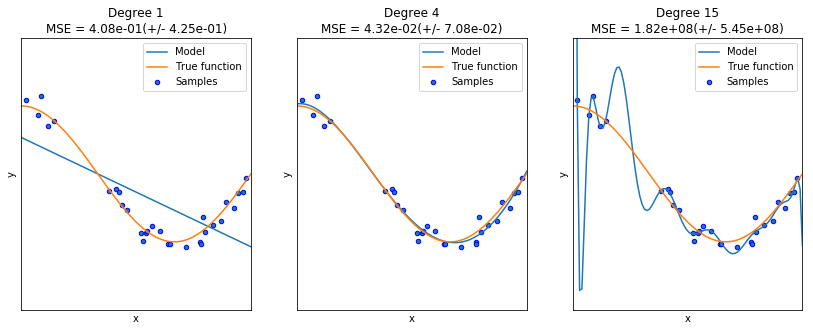

In [2]:
"""
Underfitting vs. Overfitting
"""
print(__doc__) # __doc__を使うと、各クラスやメソッドの概要を閲覧出来る

import numpy as np  # numpyモジュールを読み込む
import matplotlib.pyplot as plt  # matplotlib.pyplotモジュールを読み込む
from sklearn.pipeline import Pipeline  # sklearn.pipelineモジュールを読み込む
from sklearn.preprocessing import PolynomialFeatures  # sklearn.preprocessingモジュールを読み込む
from sklearn.linear_model import LinearRegression  # sklearn.linear_modelモジュールを読み込む
from sklearn.model_selection import cross_val_score  # sklearn.model_selectionモジュールを読み込む


def true_fun(X):
    """
    コサイン関数を実行
    """
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)  # ランダム値のタネを生成

n_samples = 30  # サンプル数
degrees = [1, 4, 15]  # 多項式に使われる次元数

X = np.sort(np.random.rand(n_samples))  # 30個のランダム値をソートして学習データとする
y = true_fun(X) + np.random.randn(n_samples) * 0.1  # 30個のランダム値に0.1を掛けて、ランダム値の余弦関数を求めた値で足したものを正解データとする

plt.figure(figsize=(14, 5))  # 表示域のサイズ
for i in range(len(degrees)):  # plt.subplot(行数, 列数, 何番目のプロットか)用の値をセット
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],  # 多項式特徴量として[1次元、4次元、15次元]を用意
                                             include_bias=False)
    linear_regression = LinearRegression()  # 回帰分析モデルのインスタンスを生成
    pipeline = Pipeline([("polynomial_features", polynomial_features),  #  pipelineを使い、特徴量と回帰分析モデルインスタンスを繋ぐ
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y) # 学習させる

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,  # クロスバリデーションによってモデルの精度を出力
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)  # 0 ~ 1までの値を100個用意
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")  # テスト(検証)実行
    plt.plot(X_test, true_fun(X_test), label="True function")  # 正解データの回帰線表示?
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")  # scatterでデータ点を表示
    plt.xlabel("x")  # xラベル
    plt.ylabel("y")  # yラベル
    plt.xlim((0, 1))  # x軸のメモリ 
    plt.ylim((-2, 2))  # y軸のメモリ
    plt.legend(loc="best")  # 凡例の枠を表示
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(  # タイトル表示
        degrees[i], -scores.mean(), scores.std()))
plt.show()


## Underfitting vs. Overfitting について著者が説明したかったこと

重回帰分析を[1次元、4次元、15次元]3種類の次元数で行っているが、
次元数を増やせば増やすほどに精度が上がっているようにみられる。

しかし、学習データは同じものを繰り返しつかっており
過学習になっているとも言える。


Ordinary Least Squares and Ridge Regression Variance



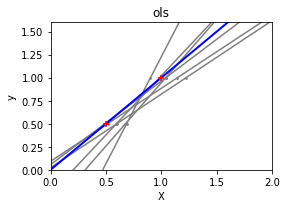

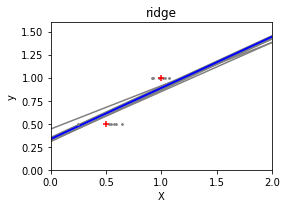

In [3]:
"""
Ordinary Least Squares and Ridge Regression Variance
"""
print(__doc__)  # __doc__を使うと、各クラスやメソッドの概要を閲覧出来る


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np  # numpyモジュールを読み込む
import matplotlib.pyplot as plt  # matplotlib.pyplotモジュールを読み込む

from sklearn import linear_model  # sklearnを読み込む

X_train = np.c_[.5, 1].T  # array型にしてトレーニング用二次元の学習データを用意
y_train = [.5, 1]  # トレーニング用正解データ
X_test = np.c_[0, 2].T  # array型にしてテスト用学習データ

np.random.seed(0)  # ランダム値の種を用意

classifiers = dict(ols=linear_model.LinearRegression(),  # dictionaryで回帰分析モデルインスタンスとRidge回帰分析モデルインスタンスを用意
                   ridge=linear_model.Ridge(alpha=.1))

for name, clf in classifiers.items():   # 2つのモデルインスタンスを
    fig, ax = plt.subplots(figsize=(4, 3))  # plt.subplot(figsize=(縦、横)大きさ)値をセット

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train  # 0.1 x 平均2、分散1の正規分布に従う乱数にトレーニングデータを足し、学習データを生成
        clf.fit(this_X, y_train)  # 乱数データで学習

        ax.plot(X_test, clf.predict(X_test), color='gray')  # テスト(検証)して表示(6個分)
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)  # 検証に使った点を表示

    clf.fit(X_train, y_train)  # トレーニング用データで学習
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')  #  テスト(検証)して表示(1個)
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10) # 検証に使った点を表示

    ax.set_title(name) # タイトルセット
    ax.set_xlim(0, 2)  # x軸のメモリ 
    ax.set_ylim((0, 1.6)) # y軸のメモリ 
    ax.set_xlabel('X') # x軸のラベル
    ax.set_ylabel('y') # y軸のラベル 

    fig.tight_layout()  # グラフ同士のラベルが重ならないようになる

plt.show()

## Ordinary Least Squares and Ridge Regression Varianceについて著者が説明したかったこと

2点に対しての単回帰分析において、  
通常の二乗誤差で学習させていくと分散がおおきくなり新しいデータが与えられた時に  
誤差が大きくなる可能性がある  
一方でRidge回帰分析の学習モデルで学習させると  
分散が小さく新たなデータが与えられても誤差は変わりにくい  